<a href="https://colab.research.google.com/github/everval/AQM2021/blob/main/Exercises_Lecture_4_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Laptop Batteries

As usual, we start by loading the Python packages that we are going to use in the analysis.

In [1]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs
import random as rnd #Package for random number generation
from scipy.stats import norm #Import the Normal distribution from the scipy.stats package
from scipy.stats import t #Import the t distribution from the scipy.stats package

A certain laptop manufacturer **wants to know the average lifetime of the batteries on their new model**.

To find the lifetime of a battery, the process involves charging and decharging it thousands of times until the battery stops holding more than 50% of its charge. 

Thus, finding out the lifetime of a particular battery, implies that **we cannot sell that laptop to the consumer**. Ergo, the company cannot possibly tests all the batteries to find the exact lifetime of its batteries. It will involve taking major losses.

Hence, determining the sample size involves some large trade-offs. 

It is a large company, thus they have opted to test 100 laptops to find a good estimate. 

Nonetheless, imagine we work on a smaller company that cannot sustain such a large loss. We are interested in analyzing the effect that a smaller sample size has on the results. 

Thus, we will compare the results of a statistical analysis using the complete, 100 batteries dataset against a much smaller 10 batteries dataset.

The data is stored in "LNVGY_test".

In [2]:
from google.colab import files

uploaded = files.upload()
laptop = pd.read_csv('LNVGY_test.csv')  #Load the data
print(laptop)       #Print the data

Saving LNVGY_test.csv to LNVGY_test.csv
       Years
0   4.797428
1   5.287248
2   5.289921
3   6.309258
4   5.284608
..       ...
95  7.314982
96  5.087204
97  4.684049
98  4.400381
99  5.010054

[100 rows x 1 columns]


The dataset contains the equivalent lifetime in years that the number of cycles of charge and discharge tfor each battery tested. 

We can get some sense of the data by looking at an histogram.

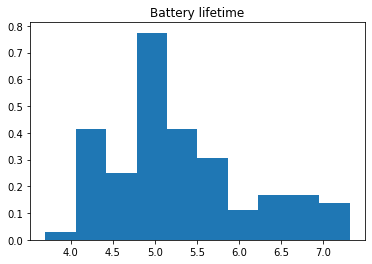

In [3]:
plt.hist(laptop['Years'],bins=10,density=True) #Plot the histogram
plt.title('Battery lifetime')  #Add the title "Battery lifetime (years)"
plt.show()

The histogram is concentrated around 5.5. 

Similar to their previous models that had batteries that last 5+ years.

Of course, the histogram does not tells us much about the average lifetime and the uncertainty associated to it.

Hence, we compute the sample mean, and sample standard deviation as a measure of the uncertainty.

In [4]:
mean_lifetime = np.mean(laptop['Years'])
std_lifetime = np.std(laptop['Years'])

display([mean_lifetime,std_lifetime])

[5.28829452124, 0.8148235936313124]

Using the CLT and LLN, we can compute the distribution of the whole dataset.

In [5]:
mean_dist_all = mean_lifetime
std_dist_all = std_lifetime/np.sqrt(100)

display([mean_dist_all,std_dist_all])

[5.28829452124, 0.08148235936313124]

Which allows us to obtain confidence interval for the lifetime of the batteries.

In [6]:
z_alpha_all = t.ppf(0.975,df=100)  #Percent point function: it finds the value such that 
                        #the percentage is achieved.
display(z_alpha_all)

lim_inf_all = mean_dist_all-z_alpha_all*std_dist_all  #CI
lim_sup_all = mean_dist_all+z_alpha_all*std_dist_all

display([lim_inf_all, lim_sup_all])

1.9839715184496334

[5.12663584100747, 5.44995320147253]

## Small Sample

Up to this point, we have worked with the whole dataset. Now we are interested in comparing the analysis of using a smaller sample size given the high costs associated to obtain the data.

Thus, we work now with a smaller sample size by selecting a subsample. 

In [7]:
rnd.seed(21)
samsize = 5
sample = laptop['Years'].sample(n=samsize)

The analysis can then proceed as before just adjusting for the smaller sample size. 

In practical terms, it will mean more uncertainty and thus bigger confidence intervals and standard deviation.

Nonetheless, the analysis is as valid as with the whole dataset only at a fraction of the cost.

We compute the sample mean and standard deviation.

In [8]:
mean_sample = np.mean(sample)
std_sample = np.std(sample)

display([mean_sample,std_sample])

[5.3212963788, 0.7256820107415056]

## Central Limit Theorem and Law of Large Numbers

The uncertainty regarding the sample mean can be modelled by a probability distribution. 

The **CLT tells us that this distribution is the Normal distribution** given by:
$$\bar{X}\sim N(\mu,\frac{\sigma}{\sqrt{n}}),$$
where $\mu$ and $\sigma$ are the mean and standard deviation of the data.

In general, **we do not know the mean and standard deviation of the data Nonetheless, using the LLN, we can estimate them using their sample equivalents**.
$$\bar{X}\approx \mu,\quad \text{and}\quad s\approx \sigma.$$

Hence, we have got all the elements to write the distribution of the sample mean.

In [9]:
mean_dist = mean_sample
std_dist = std_sample/np.sqrt(samsize)

display([mean_dist,std_dist])

[5.3212963788, 0.3245348612133478]

We can compare this distribution against the one obtained if we use all the data.

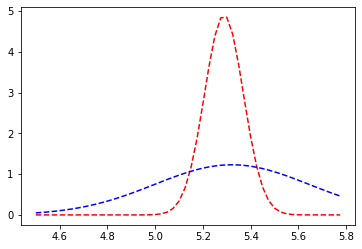

In [10]:
mean_dist_all = mean_lifetime
std_dist_all = std_lifetime/np.sqrt(100)

vals = np.arange(4.5,5.8,0.025)
nor_vals_all = norm.pdf(vals,loc=mean_dist_all,scale=std_dist_all) #Evaluating the Normal
nor_vals_dist = norm.pdf(vals,loc=mean_dist,scale=std_dist) #Evaluating the Normal
plt.plot(vals,nor_vals_all,color="red",linestyle="--") #Adding the theoretical density
plt.plot(vals,nor_vals_dist,color="blue",linestyle="--") #Adding the theoretical density
plt.show()

# Confidence Intervals

We construct a confidence interval by using the distribution of the parameter of interest.

From the Normal distribution, we know that a good mass of the probability is around the mean or location parameter. This allows us to construct intervals that contain $Z\%$ of the probability.

In the general formulation, we construct a $(1-\alpha)$ confidence interval by finding $Z_\alpha$ such that
$$[\mu-Z_\alpha\sigma,\mu+Z_\alpha\sigma],$$
contains $(1-\alpha)$ of the probability.

It is more common to write the confidence interval as
$$\mu \pm Z_\alpha \sigma.$$

We construct the confidence interval for the sample mean of the Simpsons sample where we do not know the standard deviation.

The t distribution is symmetrical, so we need to find $Z_{\alpha/2}$ such that $(1-\alpha/2)$ of the distribution is above it.

In [11]:
z_alpha = t.ppf(0.975,df=samsize)  #Percent point function: it finds the value such that 
                #the percentage is achieved.
display(z_alpha)

2.5705818366147395

We compute the confidence interval.

In [12]:
lim_inf_sample = mean_dist-z_alpha*std_dist  #CI
lim_sup_sample = mean_dist+z_alpha*std_dist

display([lim_inf_sample, lim_sup_sample])

[4.487052959216682, 6.155539798383317]

A much larger confidence interval given that we use a much smaller dataset. 

Nonetheless, notice that the sample mean computed with the whole dataset is contained inside.

Suppose we can only sell the new model if the average lifetime is more than 5 years. 

Our null hypothesis would be then:

> $H_0: \overline{Lifetime}\geq 5$ 

against the alternative

> $H_a: \overline{Lifetime}< 5$ 

Notice that this is actually a **one-tailed** test. 

First, we construct the statistic of the test:
$$t_0 = \frac{\overline{Lifetime}-5}{\frac{s}{\sqrt{n}}},$$

where $s$ is our estimate of the standard deviation.


In [13]:
t_0 = (mean_dist-5)/(std_dist)  #Compute the tests statistic
display(t_0)

0.9900211570453776

Which we compare against the critical value.

In [14]:
z_alpha_1side = t.ppf(0.05,df=samsize)  #Critical value from the oercent point function

display(z_alpha_1side)

-2.0150483726691575

Alternatively, or additionally, we can compute the **p-value** of the test.

In [15]:
t.cdf(t_0,df = samsize)   #Evaluating the p-value

0.8161881664511952

Which tells us that with a 95% confidence, the average lifetime of the batteries in the new model is more than 5 years.

We obtained this result by looking at only 10 batteries.

You may be interested in checking the last part of the analysis in the complete dataset.